<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>


<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            NLP: sentiment analysis, topic modeling & sentiment prediction
        </font>
    </h1>
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Notebook 3/5
        </font>
    </h3>
</Center>

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Introduction & context
        </font>
    </h2>
</div>

<p style="text-align: justify">
    This project focuses on extracting information and value from large volumes of textual data using Natural Language Processing (NLP). Why do you want to do this?
</p>
<ul>
    <li><p style="text-align: justify">To improve the customer experience on the website, mobile application or in the office.</p></li>
    <li><p style="text-align: justify">Assess customer satisfaction differently.</p></li>
    <li><p style="text-align: justify"></p>Evaluate the company's image.</li>
    <li><p style="text-align: justify"></p>Be more available and accessible to customers.</li>
    <li><p style="text-align: justify"></p>According to the company's activity: find new solutions to improve the banking services offered, evaluate the seller of an online sales platform or improve the product based on customer reviews.</li>
</ul>

<p style="text-align: justify">
    Our application approach is presented in 5 main streams:
</p>
<ul>
    <li>
        <u>Step 1:</u> Web Scraping
        <ul>
            <li>Collect and create the data schema.</li>
            <li>Parsing customer reviews to enrich the database: extracting title, description, date, time, nickname and rating.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 2:</u> Sentiment Analysis and Scoring
        <ul>
            <li>Understand and probe the satisfaction of each customer.</li>
            <li>Scoring the intensity and polarity of feelings from the review description.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 3:</u> Text mining and data cleaning
        <ul>
            <li>Text cleaning adapted to the sales domain and to the general content of reviews.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 4:</u> Topic Modeling (unsupervised learning)
        <ul>
            <li>To improve availability and speed up response time, reviews can be disassociated and prioritized according to the topic they address.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 5:</u> Machine Learning (supervised learning)
        <ul>
            <li>Without reading future reviews, design a robust model to identify the overall sentiment expressed by the customer.</li>
        </ul>
    </li>
</ul>

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Librairies import
        </font>
    </h2>
</div>

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots
from pyTCTK import Tokenize
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [2]:
df_data = pd.read_csv(filepath_or_buffer="amzn_customer_reviews.csv", sep=",")

In [3]:
df_data.head(3)

Pseudo                           Title  \
0  Assault Kittens  really good option portability   
1   Kenneth Cramer       excellent portable gaming   
2  Assault Kittens                 best inch world   

                                              Review              Rating  \
0  impressive form factor really good balance siz...  4.5 out of 5 stars   
1  write review anyone fence purchasing since rea...  5.0 out of 5 stars   
2  sell macbook best decisions lifeif used macboo...  1.0 out of 5 stars   

  Verified Purchase                                            Date  \
0               Yes  Reviewed in the United States on June 18, 2021   
1               Yes   Reviewed in the United States on July 7, 2021   
2               Yes  Reviewed in the United States on June 18, 2021   

                                               Score  Compound Sentiment  \
0  {'neg': 0.014, 'neu': 0.736, 'pos': 0.249, 'co...    0.9941  positive   
1  {'neg': 0.016, 'neu': 0.88, 'pos': 0.104, 'com...    0.9921  positive   
2  {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...    0.8779  positive   

   New rating    New date        Country  
0         4.5  2021-06-18  United States  
1         5.0  2021-07-07  United States  
2         1.0  2021-06-18  United States

-------------------------------------------------------------------------------------------------------------------------------

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data visualization
        </font>
    </h2>
</div>

In [4]:
df_pos = df_data[df_data["Sentiment"] == "positive"]
df_neg = df_data[df_data["Sentiment"] == "negative"]
df_neu = df_data[df_data["Sentiment"] == "neutral"]

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            1) Sentiment distribution
        </font>
    </h3>
</div>

In [5]:
class_data = df_data.groupby("Sentiment").count()["Review"].reset_index().sort_values(by="Review",ascending=False)
percent_class = class_data["Review"]
labels = class_data["Sentiment"]

fig = px.pie(
    labels,
    values=percent_class,
    hole=0.4,
    names=labels, color=labels,
    title="Sentiment distribution",
    color_discrete_map={
        "positive": "#17C37B",
        "neutral": "#FACA0C",
        "negative":"#F92969"
    }
)

fig.update_traces(
    title_font=dict(
        size=25,
        family="Verdana",
        color="darkred"
    ),
    hoverinfo="label+percent",
    textinfo="percent",
    textfont_size=20
)

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            2) Rating distribution by sentiment
        </font>
    </h3>
</div>

In [6]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["New rating"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["New rating"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["New rating"], marker=dict(color="#FACA0C")), row=1, col=3
)

fig.update_layout(title="Rating distribution by sentiment")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            3) Date of review by sentiment
        </font>
    </h3>
</div>

In [7]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["New date"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["New date"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["New date"], marker=dict(color="#FACA0C")), row=1, col=3
)                  

fig.update_layout(title="Date of review by sentiment")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            4) Customer's country by sentiment
        </font>
    </h3>
</div>

In [8]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["Country"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["Country"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["Country"], marker=dict(color="#FACA0C")), row=1, col=3
) 

fig.update_layout(title="Customer's country by sentiment")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            5) Verified purchase by sentiment
        </font>
    </h3>
</div>

In [9]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Histogram(name="Positive", x=df_pos["Verified Purchase"], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=df_neg["Verified Purchase"], marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=df_neu["Verified Purchase"], marker=dict(color="#FACA0C")), row=1, col=3
) 

fig.update_layout(title="Verified purchase by sentiment")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            6) Number of characters
        </font>
    </h3>
</div>

In [10]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

review_pos = df_data[df_data["Sentiment"] == "positive"]["Review"].str.len()
review_neg = df_data[df_data["Sentiment"] == "negative"]["Review"].str.len()
review_neu = df_data[df_data["Sentiment"] == "neutral"]["Review"].str.len()

fig.add_trace(
    go.Histogram(name="Positive", x=review_pos, marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=review_neg, marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=review_neu, marker=dict(color="#FACA0C")), row=1, col=3
)  

fig.update_layout(title="Number of characters in a review")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            7) Number of words in a review
        </font>
    </h3>
</div>

In [11]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

review_pos = df_data[df_data["Sentiment"] == "positive"]["Review"].str.split().map(lambda x: len(x))
review_neg = df_data[df_data["Sentiment"] == "negative"]["Review"].str.split().map(lambda x: len(x))
review_neu = df_data[df_data["Sentiment"] == "neutral"]["Review"].str.split().map(lambda x: len(x))

fig.add_trace(
    go.Histogram(name="Positive", x=review_pos, marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=review_neg, marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=review_neu, marker=dict(color="#FACA0C")), row=1, col=3
)    

fig.update_layout(title="Number of words in a review")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            8) Average word length in a review
        </font>
    </h3>
</div>

In [12]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Positive", "Negative", "Neutral"))

word_pos = df_data[df_data["Sentiment"] == "positive"]["Review"].str.split().apply(lambda x: [len(i) for i in x])
word_neg = df_data[df_data["Sentiment"] == "negative"]["Review"].str.split().apply(lambda x: [len(i) for i in x])
word_neu = df_data[df_data["Sentiment"] == "neutral"]["Review"].str.split().apply(lambda x: [len(i) for i in x])

fig.add_trace(
    go.Histogram(name="Positive", x=word_pos.map(lambda x: np.mean(x)), marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Histogram(name="Negative", x=word_neg.map(lambda x: np.mean(x)), marker=dict(color="#F92969")), row=1, col=2
)                     
fig.add_trace(
    go.Histogram(name="Neutral", x=word_neu.map(lambda x: np.mean(x)), marker=dict(color="#FACA0C")), row=1, col=3
)    

fig.update_layout(title="Average word length in each review")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            9) Most common words by sentiment
        </font>
    </h3>
</div>

In [13]:
df = pd.DataFrame(columns=["Word", "Count"])

for dfs in [df_pos["Review"], df_neg["Review"], df_neu["Review"]]:
    list_reviews = []
    for review in dfs:
        sentence = review.split(" ")
        for word in sentence:
            list_reviews.append(word)
    counter = Counter(list_reviews)
    word = [w[0] for w in counter.most_common(15)]
    count = [w[1] for w in counter.most_common(15)]
    df = df.append(
            dict(
                zip(
                    df.columns,
                    [
                        word,
                        count
                    ]
                )
            ),
            ignore_index=True
        )

fig = make_subplots(rows=3, cols=1, subplot_titles=("Positive", "Negative", "Neutral"))

fig.add_trace(
    go.Bar(name="Positive", x=df["Word"][0], y=df["Count"][0], marker=dict(color="#17C37B")), row=1, col=1
)
fig.add_trace(
    go.Bar(name="Negative", x=df["Word"][1], y=df["Count"][1], marker=dict(color="#F92969")), row=2, col=1
)                    
fig.add_trace(
    go.Bar(name="Neutral", x=df["Word"][2], y=df["Count"][2], marker=dict(color="#FACA0C")), row=3, col=1
)

fig.update_layout(title="Verified purchase by sentiment")

fig.show()

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            10) Wordcloud analysis by sentiment
        </font>
    </h3>
</div>

In [14]:
df = pd.DataFrame(columns=["Reviews"])

for dfs in [df_pos, df_neg, df_neu]:
    dfs = Tokenize(
        data=dfs,
        column="Review"
    ).word_tokenize()
    
    comment_words = ""
    for i in range(0, dfs["Review"].shape[0]): 
        comment_words += " ".join(dfs["Review"][i]) + " "
    
    df = df.append(
            dict(
                zip(
                    df.columns,
                    [
                        comment_words
                    ]
                )
            ),
            ignore_index=True
        )

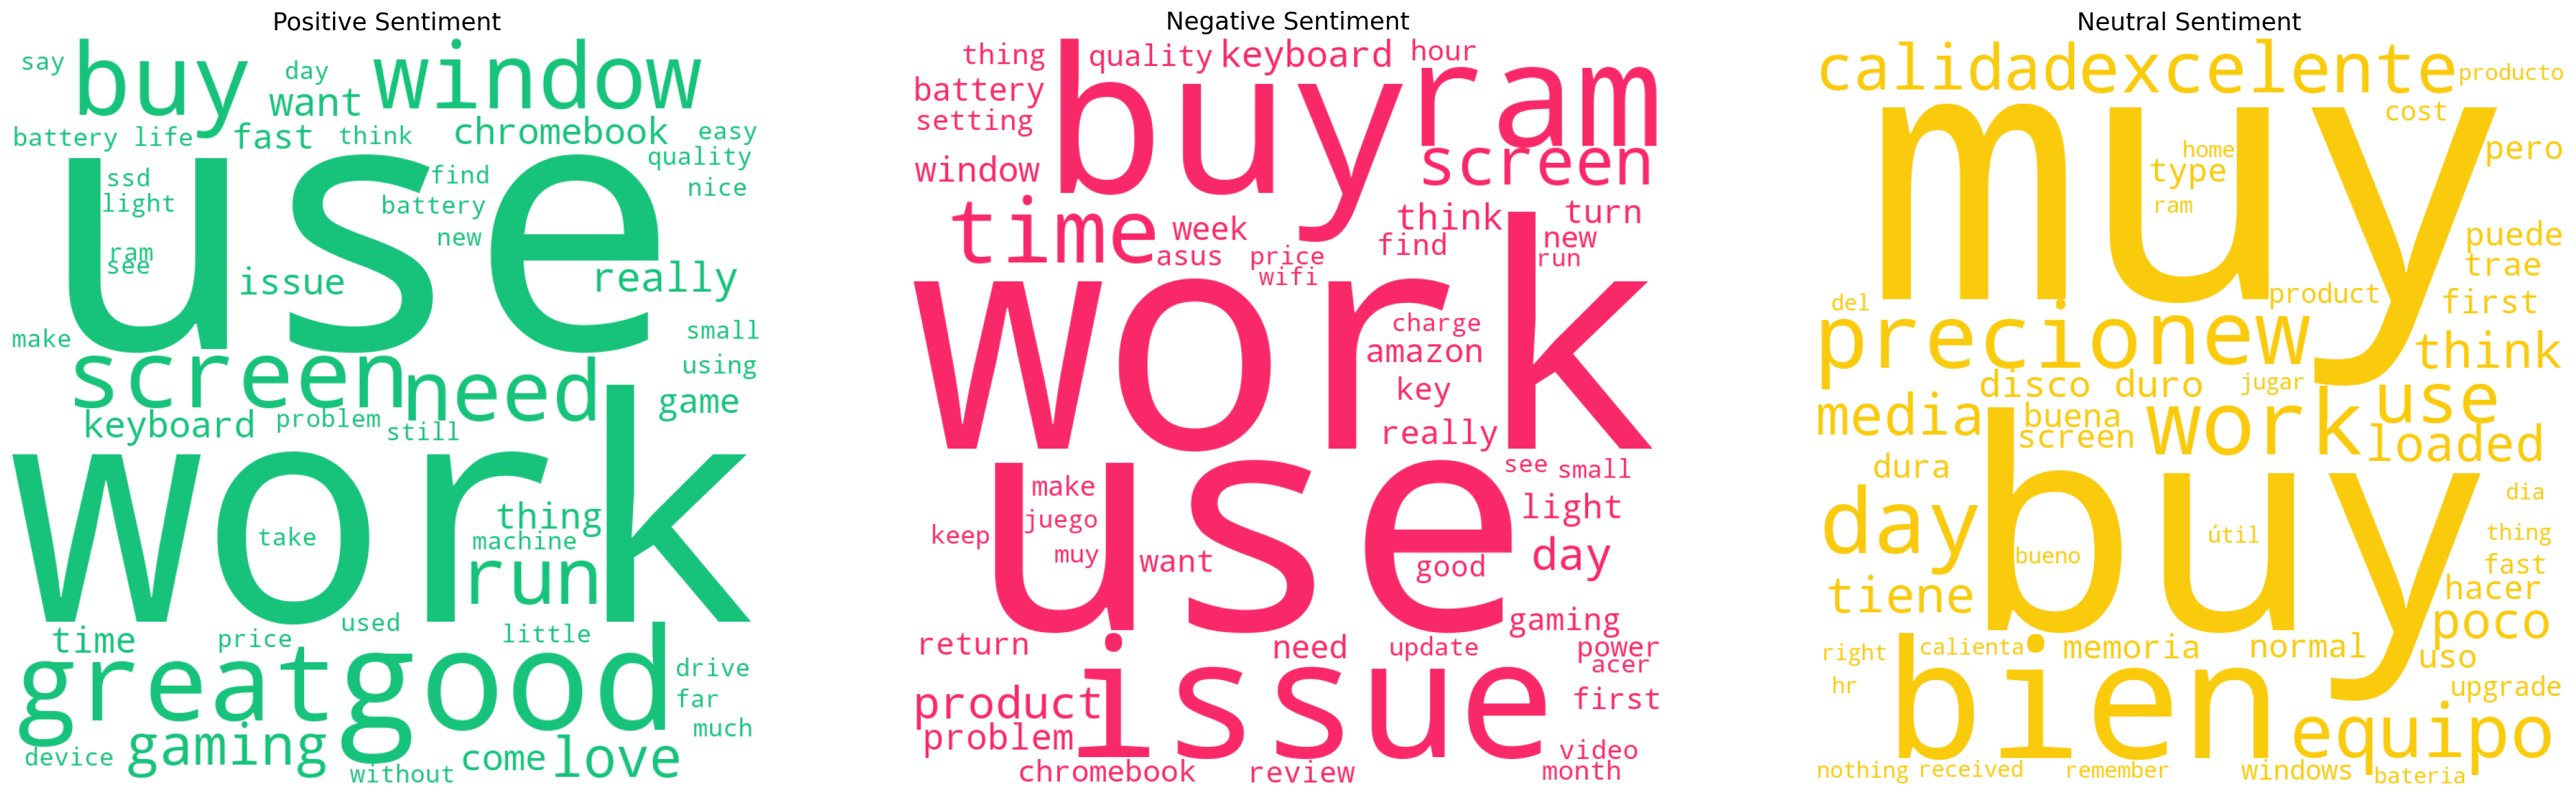

In [15]:
list_colors = ["#17C37B", "#F92969", "#FACA0C"]
list_titles = ["Positive Sentiment", "Negative Sentiment", "Neutral Sentiment"]

fig, axes = plt.subplots(1, 3, figsize=(30, 20), sharey=True, dpi=160)

for i, ax in enumerate (axes.flatten()):
    wc = WordCloud(
        width=800,
        height=800,
        max_words=50,
        min_font_size=10,
        background_color="white",
        colormap="tab10",
        color_func=lambda *args, **kwargs: list_colors[i],
        stopwords=None,
        prefer_horizontal=1.0
    )
    fig.add_subplot(ax)
    wc.generate(df["Reviews"][i])
    plt.gca().imshow(wc)
    plt.gca().set_title(list_titles[i], fontdict=dict(size=16))
    plt.gca().axis("off")
    
plt.axis("off")
plt.subplots_adjust(hspace=0.6)
plt.show()